<a href="https://colab.research.google.com/github/q-maze/location-affordability-tool/blob/main/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive') #authorization code

Mounted at /content/drive


In [27]:
!pip install geopandas
import geopandas

In [28]:
!pip install mapclassify
from mapclassify import __version__ as mc_version

In [34]:
import matplotlib.pyplot as plt

In [13]:
file = 'https://opendata.arcgis.com/datasets/8eaa0b89826244ae9246915199462328_0.csv'
data = pd.read_csv(file)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219829 entries, 0 to 219828
Columns: 123 entries, FID to SHAPE_Area
dtypes: float64(115), int64(6), object(2)
memory usage: 206.3+ MB
None


In [33]:
data = data.rename(columns={'FID': 'Object_ID', 'BlockGroups_GEOID10': '2010_Census_Geoid', 'BlockGroups_STATEFP10': 'State_ID', 'BlockGroups_COUNTYFP10': 'County_ID', 'SF1_BlockGroups_NAME': 'Name','SF1_BlockGroups_STATE_NAME': 'State', 'SF1_BlockGroups_ST_ABBREV': 'State_ABBREV'})
#data = data.drop(data.columns[4:6], axis=1)

# drop very low income because it is the same for every neighborhood
data = data.drop(data.columns[69:82], axis=1)

#filter for NaN 
data = data.dropna()

# or fillna with mean
#data = data.fillna(data.mean)

# add leading zeros to IDs
data["State_ID"]=data["State_ID"].astype(str).apply(lambda x: x.zfill(2))
data["County_ID"]=data["County_ID"].astype(str).apply(lambda x: x.zfill(3))

# combine state & county ID 
data["State-County"]=data["State_ID"].astype(str) + data["County_ID"].astype(str)
data["State-County"] = pd.to_numeric(data["State-County"], downcast='integer')

# drop Hawaii, Alaska, and DC
data_cont = data.drop(data[(data['State']=='Hawaii') | (data['State']== 'Alaska') | (data['State']== 'District of Columbia')].index)

In [22]:
# path of the county shapefile 
path='/content/drive/MyDrive/CountyShapefile' # change based on where user Shapefiles are saved

# load the shape file using geopandas
geo_county = geopandas.read_file(path)

# rename columns
geo_county.columns=['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'State-County', 'county', 'LSAD',
       'ALAND', 'AWATER', 'geometry']

geo_county['State-County'] = pd.to_numeric(geo_county["State-County"], downcast='integer')

# merge cb_2016_us_county_20m file with usa dta 
geo_county=geo_county.merge(data_cont,on='State-County').dropna(axis=0).sort_values(by='hh_type1_income',ascending=False).reset_index()

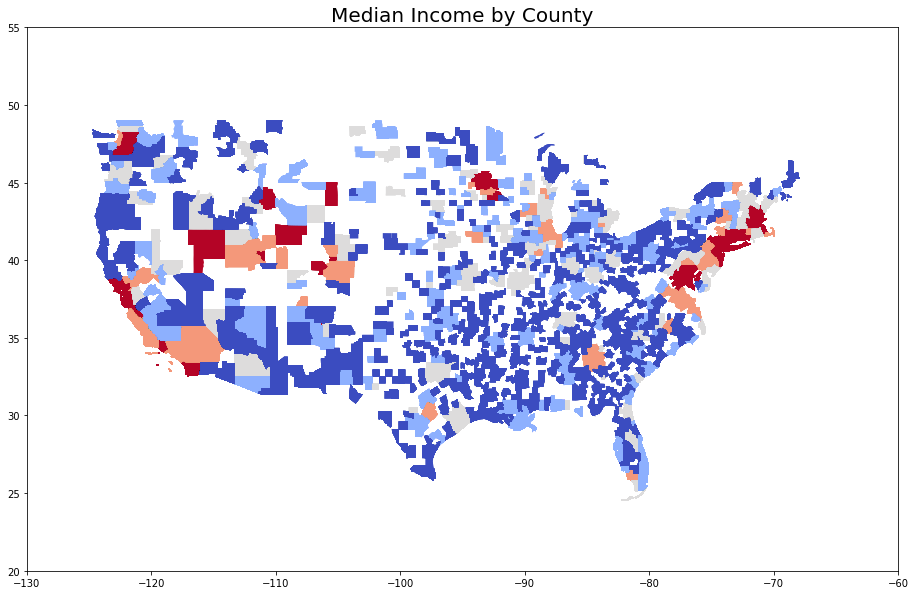

In [30]:
# plot
geo_county.plot(column='hh_type1_income',scheme="quantiles",figsize=(25,10),cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.title('Median Income by County',fontsize=20)
plt.show()

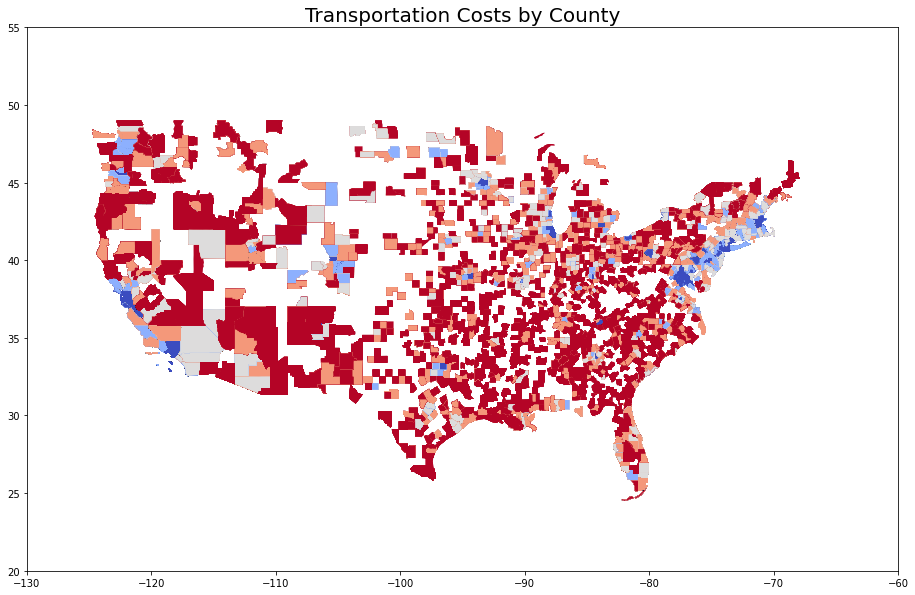

In [31]:
# plot
geo_county.plot(column='hh_type1_t',scheme="quantiles",figsize=(25,10),cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.title('Transportation Costs by County',fontsize=20)
plt.show()

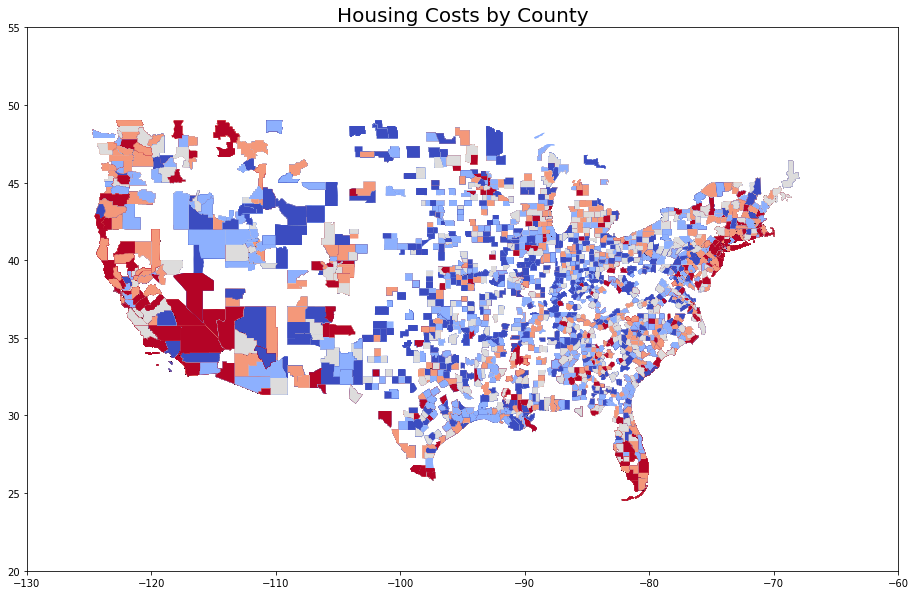

In [32]:
# plot
geo_county.plot(column='hh_type1_h',scheme="quantiles",figsize=(25,10),cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.title('Housing Costs by County',fontsize=20)
plt.show()